# Optimal Strategy in a Reverse Number Selection Game

## Problem

You are playing a game vs A. A can only randomly choose any integer from 0 to 100. You can choose any number in the range. The person who chooses the highest number loses, and pays the other two people the number they (the winner) chose. What is your strategy? What if a second player, who can also choose like you, joins the game?

## Solution

The problem can describe in the following way:

1. Player A picks a number at random between 0 and 100
2. You and (potentially) a third player B choose numbers strategically within the same range.
3. The person who chooses the highest number loses and pays the winner the amount corresponding to the winner's number.

The goal of is to minimize the risk of being the loser while potentially maximizing the payoff if you win.

### Part 1

If we choose x and and A chooses $x_A$, the following outcomes are possible:

- $x > x_A$, we lose and our payoff is $-x_A$.
- $x < x_A$, we win and the A's payoff is $+x$.

Therefore, the payoff is a piecewise function:

$$
g(x_A) =
\left\{
\begin{array}{cc}
-x_A & x > x_A \, \text{(you lose)} \\
+x & x < x_A \, \text{(you win)}
\end{array}
\right.
$$

On the other hand, since player A's choice is **uniformly** random, the PDF associated with any number $x$ among 0 and 100 being chosen is given by the uniform PDF $U(x)$:

$$
U(x) = 
\left\{
\begin{array}{cc}
\frac{1}{100 - 0} & 0 \leq x \leq 100 \\
0 & \text{otherwise}
\end{array}
\right.
$$

Now, from the definition of the mathematical expectation, we can compute the expected payoff directly

$$
\begin{split}
\mathbb{E}\left[g(x_A)\right] & = \int_{-\infty}^\infty g(x_A) U(x_A) dx_A \\
                              & = \int_0^{100} g(x_A) U(x_A) dx_A \\
                              & = \int_0^x (-x_A) \frac{1}{100} dx_A + \int_x^{100} x \frac{1}{100} dx_A \\
                              & = \frac{1}{100}\int_0^x (-x_A) dx_A + \frac{x}{100}\int_x^{100} dx_A \\
                              & = -\frac{1}{100} \left[\frac{x_A^2}{2}\right]_0^x + \frac{x}{100}\left[ x_A \right]_x^{100} \\
                              & = -\frac{x^2}{200} + \frac{x}{100}(100 - x) \\
                              & =  x - \frac{x^2}{100} -\frac{x^2}{200} \\
                              & = x - \frac{3 x^2}{200}
\end{split}
$$

Therefore, maximizing the expected payoff implies take derivative and set to zero and find the root, so the solution is $x_{\text{optimal}} \approx 33$

In [1]:
# Load basic libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Python code to find optimal x
# =============================

def expected_payoff(x):
    """
    Compute the expected payoff in the game where the highest number loses.
    Input:
        x (int): The number chosen by the player.
    Output:
        float: The expected payoff based on the given formula.
    Author:
        Rodrigo J. Kang
    Date:
        2024-11-22
    """
    return x - 3 * x**2 / 200

x_values = np.arange(0,101)
payoffs = [expected_payoff(x) for x in x_values]
optimal_x = x_values[np.argmax(payoffs)]

print(f"Optimal number to choose: {optimal_x}")

Optimal number to choose: 33


### Part 2

This case is more complex than the above one since a third player is introduce to the game who is perfectly rational like us. So the payoff function naturally take a more complex form:

$$
g(x_A, x_C) =
\left\{
\begin{array}{ccc}
- (x_A + x_C) & x_A < x \,\,\, \text{and} \,\,\, x_C < x \,\,\, \text{(you lose)} \\
+ x & x < x_A \,\,\, \text{and} \,\,\, x < x_C \,\,\, \text{(you win)} \\
0 & \text{otherwise} \,\,\, \text{(middle case)}
\end{array}
\right.
$$

Therefore, by definition the expected payoff is:

$$
\mathbb{E}\left[g(x_A)\right] = \int_{-\infty}^\infty g(x_A, x_C) f(x_A, x_C) dx_A
$$

where $f(x_A, x_C)$ is the joint PDF. However, we don't know what is the exact form of the this PDF and for this reason the integral can't do analytically, meaning that there is not a close solution. Therefore, to solve the problem we could use a numerical approach to find the best interval. The optimal interval must satisfy be determined by:

- **Lower bound**: A number above 0 (to avoid a trivial payoff).
- **Upper bound**: A value below 100 to reduce the risk of being the highest number.

In [3]:
def numerical_expected_payoff(lower_bound, upper_bound, n_simulations=100000, range_limit=100):
    """
    Simulates a game to calculate the expected payoff within a given interval.
    Inputs:
        - lower_bound (float): The lower bound of the interval for our choice.
        - upper_bound (float): The upper bound of the interval for our choice.
        - n_simulations (int): The number of simulations to run (default is 100,000).
        - range_limit (float): The upper limit for the choices of Players A and C (default is 100).
    Outputs:
        - float: The expected payoff within the given interval.
    Author:
        Rodrigo J. Kang
    Date:
        2024-11-22
    """
    # Assuming that the choices of players A and C are uniformly distributed
    x_A = np.random.uniform(0, range_limit, n_simulations)
    x_C = np.random.uniform(0, range_limit, n_simulations)
    
    # Our choice is constrained within the given interval
    x = np.random.uniform(lower_bound, upper_bound, n_simulations)

    # Calculate payoffs
    payoffs = np.zeros(n_simulations)
    for i in range(n_simulations):
        if x[i] > x_A[i] and x[i] > x_C[i]: # You lose
            payoffs[i] = -(x_A[i] + x_C[i])
        elif x[i] <= x_A[i] and x[i] <= x_C[i]: # You win
            payoffs[i] = x[i]
        else: # Middle case (neither win nor lose)
            payoffs[i] = 0

    return np.mean(payoffs)

In [4]:
range_limit = 100

# Simulate different intervals
intervals = np.linspace(0, range_limit, 20)

# Find the best interval (with highest expected payoff)
expected_payoffs = []
for i in range (len(intervals) - 1):
    lower, upper = intervals[i], intervals[i + 1]
    expected_payoffs.append(numerical_expected_payoff(lower, upper))

best_interval_idx = np.argmax(expected_payoffs)
best_lower = intervals[best_interval_idx]
best_upper = intervals[best_interval_idx + 1]
best_payoff = expected_payoffs[best_interval_idx]

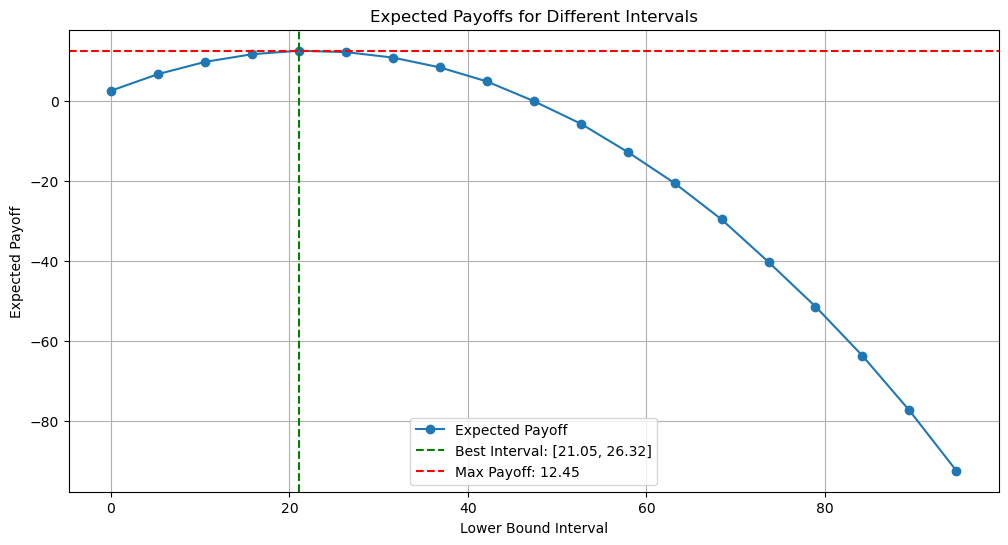

In [5]:
# Plots results
plt.figure(figsize=(12, 6))
plt.plot(intervals[:-1], expected_payoffs, marker='o', label="Expected Payoff")
plt.axvline(best_lower, color='green', linestyle = '--', label=f"Best Interval: [{best_lower:.2f}, {best_upper:.2f}]")
plt.axhline(best_payoff, color='red', linestyle='--', label=f"Max Payoff: {best_payoff:.2f}")
plt.title("Expected Payoffs for Different Intervals")
plt.xlabel("Lower Bound Interval")
plt.ylabel("Expected Payoff")
plt.legend()
plt.grid()

# Show plot
plt.show()